# Test FRED API

In [1]:
import os
os.environ['FRED_API_KEY'] = '6fba36c239bdc526cd2cbf653fbf70bd'
import pyfredapi as pf
master_categories = pf.get_category_children(category_id=0)

In [ ]:
import copy
import time

for category in master_categories['categories']:
    print(f"Looking through category: {category['name']}")
    seen_categories = set()
    leaf_categories = []
    child_categories = copy.deepcopy(pf.get_category_children(category_id=category['id'])['categories'])
    while len(child_categories) > 0:
        time.sleep(0.7)
        current_category = child_categories.pop()
        if current_category['id'] in seen_categories:
            continue
        seen_categories.add(current_category['id'])
        print(f"Looking through child category: {current_category['name']}")
        current_category_children = copy.deepcopy(pf.get_category_children(category_id=current_category['id'])['categories'])
        if len(current_category_children) == 0:
            leaf_categories.append(current_category)
        else:
            child_categories.extend(current_category_children)
    print(leaf_categories)

In [30]:
import json
import copy
import time
from tqdm import tqdm

cur_series = set()
with open('data/fred_categories/banking.json', 'r') as f:
    data = json.load(f)
    pbar = tqdm(data)
    for category in pbar:
        time.sleep(0.55)
        current_series = copy.deepcopy(pf.get_category_series(category_id=category['id']))
        filtered_series = [
            series_info.id
            for series_info in current_series.values()
            if series_info.popularity >= 20 and series_info.frequency_short == 'M' and int(series_info.observation_start[:4]) <= 1970
        ]
        cur_series.update(filtered_series)
print(list(cur_series))

100%|██████████| 161/161 [02:12<00:00,  1.21it/s]

['M1REAL', 'M2MSL', 'TB1YR', 'DEMDEPSL', 'CONSUMER', 'RESBALNS', 'GS3', 'AAA', 'T10YFFM', 'CURRNS', 'EXCRESNS', 'MBCURRCIR', 'STDSL', 'BUSLOANS', 'M2SL', 'FLTOTALSL', 'USGSEC', 'M2NS', 'GS20', 'BOGMBASE', 'LOANINV', 'DISCBORR', 'BAA', 'CFNAI', 'TOTALSL', 'TOTALSLAR', 'CURRSL', 'TCDSL', 'TVCKSSL', 'GS5', 'MPRIME', 'CFNAIDIFF', 'BAAFFM', 'TB6SMFFM', 'M1NS', 'CURRDD', 'IRA', 'REVOLSLAR', 'REQRESNS', 'CFNAIMA3', 'TOTRESNS', 'M2OWN', 'BOGMBBM', 'GS1', 'BAA10YM', 'M1SL', 'TB6MS', 'CURRCIR', 'AAA10YM', 'LOANS', 'M2REAL', 'BORROW', 'REVOLSL', 'M3SL', 'TB3MS', 'NONBORRES', 'TB3SMFFM', 'SNBMONTBASE', 'NONREVSL', 'AMBSL', 'FEDFUNDS', 'GS10', 'REALLN']


In [52]:
banking_series = ['M1REAL', 'M2MSL', 'DEMDEPSL', 'CONSUMER', 'GS3', 'AAA', 'T10YFFM', 'CURRNS', 'MBCURRCIR', 'STDSL', 'BUSLOANS', 'M2SL', 'FLTOTALSL', 'USGSEC', 'M2NS', 'BOGMBASE', 'LOANINV', 'BAA', 'CFNAI', 'TOTALSL', 'TOTALSLAR', 'CURRSL', 'GS5', 'MPRIME', 'CFNAIDIFF', 'BAAFFM', 'TB6SMFFM', 'M1NS', 'CURRDD', 'IRA', 'REVOLSLAR', 'CFNAIMA3', 'TOTRESNS', 'BOGMBBM', 'GS1', 'BAA10YM', 'M1SL', 'TB6MS', 'CURRCIR', 'AAA10YM', 'LOANS', 'M2REAL', 'BORROW', 'REVOLSL', 'M3SL', 'TB3MS', 'NONBORRES', 'TB3SMFFM', 'SNBMONTBASE', 'NONREVSL', 'FEDFUNDS', 'GS10', 'REALLN']
labor_series = ['USGOVT', 'CES9091000001', 'MANEMP', 'LNS11300002', 'EMRATIO', 'AWHNONAG', 'CEU3000000001', 'USLAH', 'USGOOD', 'CES2000000008', 'USPRIV', 'LNS11300003', 'PAYEMS', 'USTRADE', 'LNS14000024', 'USWTRADE', 'CEU0500000008', 'LNU01300000', 'CLF16OV', 'USMINE', 'LNU01000000', 'USPBS', 'CES0500000006', 'USCONS', 'LNS11324230', 'AWOTMAN', 'LNS12300012', 'LNS11000060', 'CEU3100000008', 'LNS13023653', 'UNRATE', 'CES0500000030', 'LNS11300060', 'LNS13000001', 'USSERV', 'FEDMINFRMWG', 'LNS14000028', 'LNS14000002', 'LNU01300060', 'LNS11300012', 'LNU01300002', 'AWHI', 'USEHS', 'SRVPRD', 'USFIRE', 'AHETPI', 'LNS11300001', 'LNS14000001', 'LNS12300060', 'LNS14024887', 'CES3000000008', 'UNEMPLOY', 'CIVPART', 'USTPU', 'LNS11300029', 'UEMPMEAN', 'UNRATENSA', 'LNS13000002', 'LNS12300002', 'CE16OV', 'CES9093000001', 'LNU03000000', 'LNS11300028', 'LNU01300001', 'CES9092000001', 'USINFO', 'AWHMAN', 'LNS12300001', 'LNS11300036', 'PAYNSA', 'FEDMINNFRWG']
nat_accnt_series = ['MVMTD027MNFRBDAL', 'DPCERAM1M225NBEA', 'DDURRG3M086SBEA', 'DGDSRG3M086SBEA', 'DFXARC1M027SBEA', 'PQ001260M', 'DPCERA3M086SBEA', 'DPCCRAM1M225NBEA', 'DPCCRC1M027SBEA', 'MVGFD027MNFRBDAL', 'DNRGRC1M027SBEA']
prod_series = ['HOUST1F', 'HTRUCKSSA', 'HOUST2F', 'UNDCON5MUSA', 'HOUST5F', 'UNDCON1USA', 'HSN1F', 'HSN1FNSA', 'DAUTOSA', 'EUROREC', 'SHTSAUS', 'COMPUTNSA', 'USRECM', 'MSACSR', 'UNDCONTSA', 'HTRUCKSNSA', 'HNFSEPUSSA', 'HTRUCKSSAAR', 'MSPNHSUS', 'CMRMTSPL', 'PERMITNSA', 'PERMIT', 'COMPU5MUSA', 'HOUST1FNSA', 'HOUST', 'COMPUTSA', 'PERMIT5', 'UNDCONTNSA', 'PERMIT1', 'USREC', 'DAUTOSAAR', 'MSACSRNSA', 'COMPU1USA', 'AUTHNOTT', 'HOUSTNSA']
price_series = ['CPIFABSL', 'WPUSI019011', 'WPSFD4111', 'WPU0622', 'WPU01130216', 'CUUR0000SEHA', 'WPU1321', 'CUSR0000SAH1', 'WPU03', 'CRESTKCPIXSLTRM159SFRBATL', 'CPIUFDNS', 'WPUSI012011', 'WPU071102', 'WPU01', 'CPIUFDSL', 'COREFLEXCPIM679SFRBATL', 'WPU1141', 'CUUR0000SEFJ', 'PCU482111482111', 'WPU111', 'CUSR0000SAS', 'WPU11', 'WPU07', 'WPU0811', 'WPSFD49207', 'WPU102', 'CUSR0000SETB01', 'CUUR0000SETB01', 'CPIHOSSL', 'WPU122', 'CUUR0000SEAE', 'STICKCPIXSHLTRM159SFRBATL', 'CUSR0000SETA01', 'PPIIDC', 'WPU071', 'WPU102501', 'WPU1012', 'CUUR0000SETA01', 'CUUR0000SAS4', 'WPS101', 'PCU22112222112243', 'CORESTICKM158SFRBATL', 'WPU0913', 'WPU012', 'CUSR0000SASLE', 'CUSR0000SEHE', 'WPU0812', 'CUUR0000SAM2', 'CPIAPPSL', 'WPU0121', 'WPU137', 'CUSR0000SACL1E', 'CUUR0000SA0R', 'WPU06', 'CUUR0000SA0L2', 'PCU311421311421', 'CUUR0000SASLE', 'WPU066', 'WPU0278', 'CUUR0000SAH1', 'CPIENGSL', 'WPUID62', 'CORESTICKM157SFRBATL', 'CUSR0000SAF112', 'WPU065202', 'CUSR0000SAF116', 'WPU1191', 'CUSR0000SA0L2', 'CUUR0000SAF11', 'WPU114', 'CORESTICKM159SFRBATL', 'COREFLEXCPIM159SFRBATL', 'WPU061', 'WPU0922', 'WPS061', 'CUSR0000SAC', 'CUSR0000SAD', 'WPSFD41312', 'WPU1178', 'CUSR0000SAM1', 'WPU1311', 'WPU081', 'CPILFESL', 'CWUR0000SA0R', 'WPU1411', 'WPU0711', 'WPU083', 'CUSR0000SETD', 'WPU1017', 'CUSR0000SAH3', 'WPU117', 'PCU212321212321', 'WPU10', 'WPU08', 'WPU0571', 'CUSR0000SAN', 'CUSR0000SAF11', 'CUSR0000SEHF01', 'WPU0561', 'CPIHOSNS', 'CUUR0000SETA02', 'WPU0531', 'WPU0221', 'WPU011', 'WPU03T15M05', 'WPU101', 'CPIENGNS', 'WPU102502', 'WPU09', 'WPS081', 'CPIMEDSL', 'CUSR0000SEHF', 'CPILFENS', 'WPUFD49207', 'WPU091301', 'CPIOGSSL', 'CPITRNSL', 'CORESTICKM679SFRBATL', 'WPU071201', 'WPU13', 'CUSR0000SETA02', 'CUUR0000SEFV', 'CRESTKCPIXSLTRM679SFRBATL', 'WPUID61', 'WPU1392', 'WPU029', 'WPU026301', 'CUSR0000SEFV', 'WPU0911', 'WPU112', 'CUSR0000SAM2', 'WPU1173', 'PPIENG', 'CUSR0000SAF113', 'CUSR0000SEHF02']
academic_series = ['SAHMCURRENT', 'MBM0UKM', 'LIOR3MUKM', 'M0264AUSM500NNBR', 'M11007USM322NNBR', 'M1490AUSM157SNBR', 'M0263AUSM500NNBR', 'M08343USM232SNBR', 'USUKFXUKM', 'M04128USM350NNBR', 'M1109BUSM293NNBR', 'M14047USM156NNBR', 'M08297USM548NNBR', 'M0929BUSM155NNBR', 'M16072USM351SNBR', 'M1125AUSM343NNBR', 'M0892AUSM156SNBR', 'M09086USM156NNBR', 'BOERUKM', 'M04220USM156NNBR', 'CHNMAINLANDEPU', 'RGDPMRPUKM', 'M08354USM310NNBR', 'AURUKM', 'M0848BGBM352SNBR', 'M1329AUSM193NNBR', 'M13050USM156NNBR', 'M1346BUSM156NNBR', 'SAHMREALTIME', 'M09075USM476NNBR', 'IPIUKM', 'RECPROUSM156N', 'M14060USM156NNBR', 'M10092USM144NNBR', 'M14062USM027NNBR']

print(f"Banking Series Count: {len(banking_series)}")
print(f"Labor Series Count: {len(labor_series)}")
print(f"National Accounts Series Count: {len(nat_accnt_series)}")
print(f"Production Series Count: {len(prod_series)}")
print(f"Price Series Count: {len(price_series)}")
print(f"Academic Series Count: {len(academic_series)}")

Banking Series Count: 53
Labor Series Count: 71
National Accounts Series Count: 11
Production Series Count: 35
Price Series Count: 135
Academic Series Count: 35


In [53]:
import time
import pandas as pd

big_df = None
all_collections = [banking_series, labor_series, nat_accnt_series, prod_series, price_series, academic_series]
for series_list in all_collections:
    cur_collection = pf.SeriesCollection(series_id=[])
    for series in series_list:
        time.sleep(0.55)
        cur_collection.add(series)
    cur_df = cur_collection.merge_wide()
    cur_df["date"] = pd.to_datetime(cur_df["date"])
    cur_df = cur_df.loc[(cur_df['date'] >= '1970-01-01') & (cur_df['date'] <= '2022-07-01')]
    cur_df = cur_df.set_index("date")
    cur_df = cur_df.sort_index()
    if big_df is None:
        big_df = cur_df
    else:
        big_df = big_df.join(cur_df)

Requesting series M1REAL...
Requesting series M2MSL...
Requesting series DEMDEPSL...
Requesting series CONSUMER...
Requesting series GS3...
Requesting series AAA...
Requesting series T10YFFM...
Requesting series CURRNS...
Requesting series MBCURRCIR...
Requesting series STDSL...
Requesting series BUSLOANS...
Requesting series M2SL...
Requesting series FLTOTALSL...
Requesting series USGSEC...
Requesting series M2NS...
Requesting series BOGMBASE...
Requesting series LOANINV...
Requesting series BAA...
Requesting series CFNAI...
Requesting series TOTALSL...
Requesting series TOTALSLAR...
Requesting series CURRSL...
Requesting series GS5...
Requesting series MPRIME...
Requesting series CFNAIDIFF...
Requesting series BAAFFM...
Requesting series TB6SMFFM...
Requesting series M1NS...
Requesting series CURRDD...
Requesting series IRA...
Requesting series REVOLSLAR...
Requesting series CFNAIMA3...
Requesting series TOTRESNS...
Requesting series BOGMBBM...
Requesting series GS1...
Requesting ser

In [56]:
print(big_df.shape)
print(big_df.dropna(1).shape)
big_df = big_df.dropna(axis=1)
big_df.shape

(631, 340)
(631, 304)


/tmp/ipykernel_1737070/2159827185.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  print(big_df.dropna(1).shape)


(631, 304)

In [57]:
big_df.to_csv('data/fred_new_data.csv')

# Load data and compute memory:

In [18]:
import pandas as pd

# load data
data = pd.read_csv('data/inputs/fredmd_transf.csv')

# fix dates
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")

# fill missing values
data = data.interpolate(method='linear', limit_direction='forward', axis=0)
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')

# normalize data
# data = (data - data.mean()) / data.std()

print(f"Original data shape: {data.shape}")

# compute moving average
data = data.rolling(window=12).mean()

# drop missing values
data = data.dropna()
print(f"Shape after dropping NA values: {data.shape}")
print(data.columns)

Original data shape: (757, 127)
Shape after dropping NA values: (746, 127)
Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'CUSR0000SAC', 'CUSR0000SAD', 'CUSR0000SAS', 'CPIULFSL',
       'CUSR0000SA0L2', 'CUSR0000SA0L5', 'PCEPI', 'DDURRG3M086SBEA',
       'DNDGRG3M086SBEA', 'DSERRG3M086SBEA'],
      dtype='object', length=127)


In [21]:
import pandas as pd

# load data
data_all = pd.read_csv('data/inputs/fred_new_data.csv')

# fix dates
data_all["date"] = pd.to_datetime(data_all["date"])
data_all = data_all.set_index("date")

# fill missing values
data_all = data_all.interpolate(method='linear', limit_direction='forward', axis=0)
data_all = data_all.fillna(method='ffill')
data_all = data_all.fillna(method='bfill')

# normalize data
# data_all = (data_all - data_all.mean()) / data_all.std()

print(f"Original data shape: {data_all.shape}")

# compute moving average
data_all = data_all.rolling(window=12).mean()

# drop missing values
data_all = data_all.dropna()
print(f"Shape after dropping NA values: {data_all.shape}")
print(data_all.columns)

Original data shape: (631, 304)
Shape after dropping NA values: (620, 304)
Index(['M1REAL', 'M2MSL', 'DEMDEPSL', 'CONSUMER', 'GS3', 'AAA', 'T10YFFM',
       'CURRNS', 'MBCURRCIR', 'STDSL',
       ...
       'WPU112', 'CUSR0000SAM2', 'WPU1173', 'PPIENG', 'CUSR0000SAF113',
       'CUSR0000SEHF02', 'SAHMCURRENT', 'CHNMAINLANDEPU', 'SAHMREALTIME',
       'RECPROUSM156N'],
      dtype='object', length=304)


/tmp/ipykernel_592190/2215966180.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_all = data_all.fillna(method='ffill')
/tmp/ipykernel_592190/2215966180.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_all = data_all.fillna(method='bfill')


In [2]:
import numpy as np
import pandas as pd

data_factors = pd.read_csv('data/inputs/fredmd_factors_raw.csv')
transformation_codes = data_factors.iloc[0]
data_factors = data_factors.drop(0)
transformation_codes = transformation_codes.to_dict()
del transformation_codes['sasdate']

small = 1e-6
for column in data_factors.columns:
    if column in transformation_codes:
        match int(transformation_codes[column]):
            case 1:
                data_factors[column] = data_factors[column]

            case 2: # First difference: x(t)-x(t-1)
                data_factors[column] = data_factors[column].diff()

            case 3: # Second difference: (x(t)-x(t-1))-(x(t-1)-x(t-2))
                data_factors[column] = data_factors[column].diff().diff()

            case 4: # Natural log: ln(x)
                data_factors[column] = data_factors[column].apply(lambda x: np.log(x) if x > small else None)

            case 5: # First difference of natural log: ln(x)-ln(x-1)
                data_factors[column] = data_factors[column].apply(lambda x: np.log(x) if x > small else None)
                data_factors[column] = data_factors[column].diff()

            case 6: # Second difference of natural log: (ln(x)-ln(x-1))-(ln(x-1)-ln(x-2))
                data_factors[column] = data_factors[column].apply(lambda x: np.log(x) if x > small else None)
                data_factors[column] = data_factors[column].diff().diff()

            case 7: # First difference of percent change: (x(t)/x(t-1)-1)-(x(t-1)/x(t-2)-1)
                data_factors[column] = data_factors[column].pct_change()
                data_factors[column] = data_factors[column].diff()

data_factors = data_factors.drop([1, 2]).reset_index(drop=True)

data_factors = data_factors.ffill()
data_factors = data_factors.fillna(0.0)

data_factors['sasdate'] = pd.to_datetime(data_factors['sasdate'], format='%m/%d/%Y')
data_factors = data_factors.rename(columns={'sasdate': 'date'})
data_factors = data_factors.set_index('date')

#data_factors = data_factors.rolling(window=12).mean()
#data_factors = data_factors.dropna()

In [20]:
col_set1 = set(data.columns)
col_set2 = set(data_all.columns)

union_cols = col_set1.union(col_set2)
intersection_cols = col_set1.intersection(col_set2)
only_data_cols = col_set1 - intersection_cols
only_data_all_cols = col_set2 - intersection_cols

print(f"Union columns: {len(union_cols)}")
print(f"Intersection columns: {len(intersection_cols)}")

print(f"Earliest date (data): {data.index.min()}")
print(f"Earliest date (data_all): {data_all.index.min()}")

print(f"Latest date (data): {data.index.max()}")
print(f"Latest date (data_all): {data_all.index.max()}")

combined_data = data.loc[(data.index >= data_all.index.min()) & (data.index <= data_all.index.max())].join(data_all[list(only_data_all_cols)], how='inner')

print(combined_data.shape)

Union columns: 380
Intersection columns: 51
Earliest date (data): 1960-12-01 00:00:00
Earliest date (data_all): 1970-12-01 00:00:00
Latest date (data): 2023-01-01 00:00:00
Latest date (data_all): 2022-07-01 00:00:00
(620, 380)


                      PC0       PC1       PC2       PC3       PC4       PC5  \
RPI              0.032678 -0.047984  0.000752 -0.025343  0.063781 -0.045892   
W875RX1         -0.112550 -0.068211 -0.038119  0.032999  0.006149  0.006541   
DPCERA3M086SBEA -0.146550  0.027131 -0.060616  0.042417 -0.018647 -0.143320   
CMRMTSPLx       -0.135673 -0.008126 -0.053135  0.014012  0.024570 -0.093309   
RETAILx         -0.127633  0.065554 -0.019088  0.035344  0.000766 -0.146614   
...                   ...       ...       ...       ...       ...       ...   
UMCSENTx        -0.037855  0.012142 -0.030014 -0.014400 -0.012411 -0.098975   
DTCOLNVHFNM     -0.002451  0.009939  0.011267 -0.016205 -0.015283 -0.058104   
DTCTHFNM        -0.006255  0.013653  0.012419 -0.018355 -0.013001 -0.032122   
INVEST          -0.015517  0.016652 -0.007961  0.011221 -0.015233  0.019285   
VIXCLSx          0.052323  0.001555  0.009238  0.039914 -0.001340 -0.121704   

                      PC6       PC7       PC8      

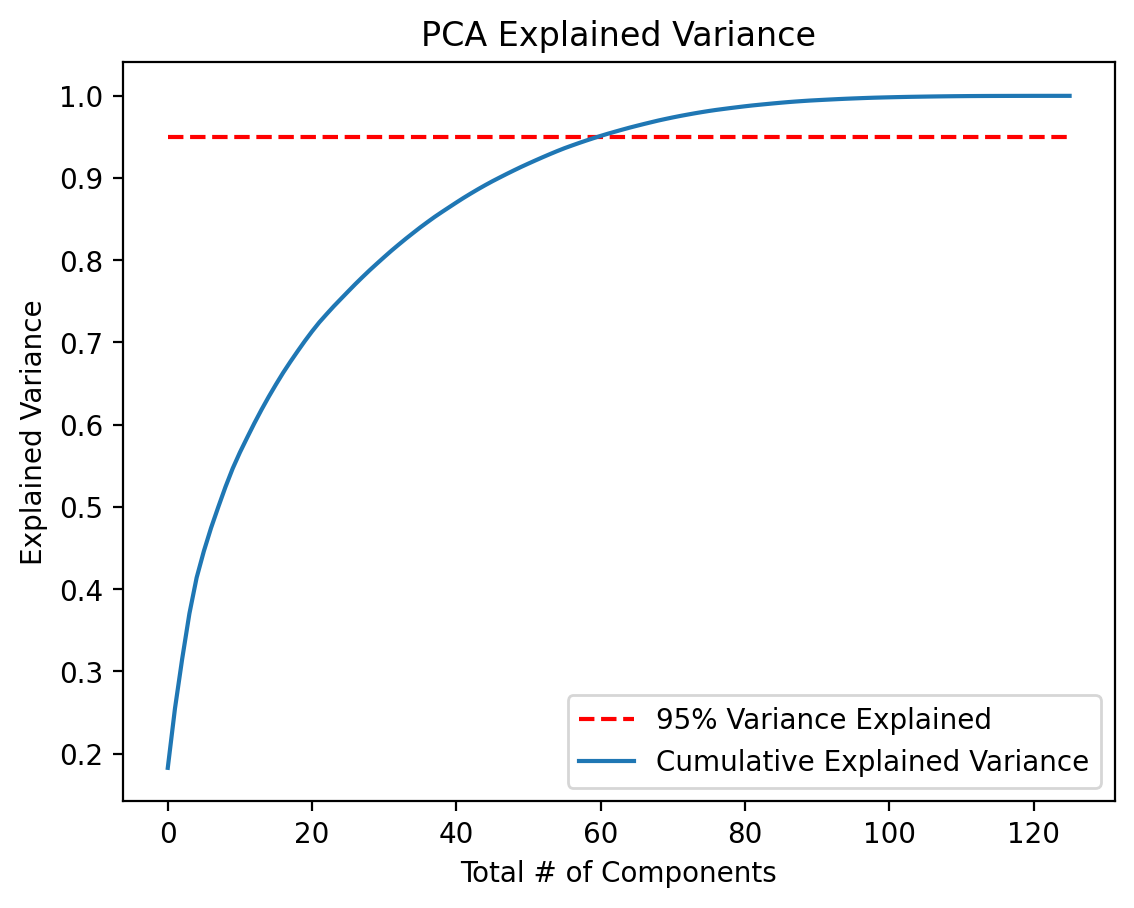

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

df_normalized = data_factors

# You must normalize the data before applying the fit method
df_normalized=(df_normalized - df_normalized.mean()) / df_normalized.std()
pca = PCA(n_components=df_normalized.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df_normalized.columns)
print(loadings)

DESIRE_EXPLAINED_VARIANCE = 0.95
total_explained_variance = 0.0
for i, x in enumerate(pca.explained_variance_ratio_):
    total_explained_variance += x
    if total_explained_variance >= DESIRE_EXPLAINED_VARIANCE:
        print(f"Number of components to explain {DESIRE_EXPLAINED_VARIANCE * 100}% variance: {i+1}")
        break
n_components = i+1
%config InlineBackend.figure_format = 'retina'
plot.plot([DESIRE_EXPLAINED_VARIANCE] * len(pca.explained_variance_ratio_), 'r--')
plot.plot(pca.explained_variance_ratio_.cumsum())
plot.title('PCA Explained Variance')
plot.ylabel('Explained Variance')
plot.xlabel('Total # of Components')
plot.legend(['95% Variance Explained', 'Cumulative Explained Variance'])
plot.show()

In [19]:
eigenvector = 'PC0'
print(f'Top 20 positive loadings for {eigenvector}:')
print(loadings[eigenvector].sort_values(ascending=False).head(20))

print(f'Top 20 negative loadings for {eigenvector}:')
print(loadings[eigenvector].sort_values(ascending=True).head(20))

Top 20 positive loadings for PC0:
UNRATE           0.177074
ISRATIOx         0.141064
UEMPLT5          0.125355
CLAIMSx          0.109995
UEMP5TO14        0.108300
M2SL             0.082972
M2REAL           0.066464
BUSLOANS         0.063499
BOGMBASE         0.055224
VIXCLSx          0.052323
RPI              0.032678
TOTRESNS         0.031303
IPB51222S        0.024413
M1SL             0.020033
EXCAUSx          0.015553
BAAFFM           0.014759
UEMP27OV         0.009330
S&P div yield    0.008564
TWEXAFEGSMTHx    0.007739
CES2000000008    0.004621
Name: PC0, dtype: float64
Top 20 negative loadings for PC0:
PAYEMS      -0.189213
IPMANSICS   -0.187840
USGOOD      -0.185517
IPFPNSS     -0.185388
INDPRO      -0.182321
USTPU       -0.181256
MANEMP      -0.180290
SRVPRD      -0.179239
CUMFNS      -0.179179
IPFINAL     -0.178635
CE16OV      -0.176590
USTRADE     -0.176235
IPBUSEQ     -0.175075
NDMANEMP    -0.171366
DMANEMP     -0.169909
IPDCONGD    -0.166834
USWTRADE    -0.159119
IPDMAT      

In [4]:
# Use the top n components to transform the data
pca = PCA(n_components=df_normalized.shape[1])
pca.fit(df_normalized)
df_transformed = pd.DataFrame(pca.transform(df_normalized),
columns=['PC%s' % _ for _ in range(df_normalized.shape[1])],
index=df_normalized.index)
df_transformed = df_transformed[['PC%s' % _ for _ in range(n_components)]]

print(df_transformed)

                 PC0       PC1       PC2       PC3        PC4       PC5  \
date                                                                      
1959-03-01 -4.445689 -0.524517 -4.661870 -4.103060 -11.127190  6.709019   
1959-04-01 -5.162850  0.035858 -3.401943 -5.426982 -10.474380  8.564347   
1959-05-01 -3.074062 -0.201416 -4.230346 -5.446248 -10.820700  6.986077   
1959-06-01 -0.553896  0.863386 -2.562861 -5.027313 -11.673215  6.739165   
1959-07-01  2.813391  0.466066 -2.929920 -4.030135 -11.611610  6.543757   
...              ...       ...       ...       ...        ...       ...   
2024-05-01  0.533729 -4.543290 -0.881444  1.510338  -1.071159 -1.204230   
2024-06-01  1.374189  1.504730  0.795744  1.135431  -0.970126 -1.123690   
2024-07-01  1.083124  2.882297  1.596542  1.262970  -0.805368 -0.224646   
2024-08-01  0.455701 -0.150235 -0.347186  3.921362  -0.582173  0.699338   
2024-09-01  1.157768  1.079476  0.306698  3.757254  -1.437966 -0.958308   

                  PC6   

In [4]:
factors_done = pd.read_csv('data/inputs/fredmd_factors_done.csv')
factors_done.index = df_normalized.index
factors_done

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
date,,,,,,,,,,,,,,,,,,,,,
1959-03-01,-0.611870,0.126600,-0.119470,0.110450,0.007699,-0.074620,0.029480,0.044809,0.068390,0.131050,...,-0.009476,-0.086679,0.009334,-0.004331,-0.060508,-0.000144,0.041232,-0.048646,-0.003873,0.068389
1959-04-01,-0.713780,0.054371,-0.090836,0.058511,0.023051,-0.196560,-0.255770,-0.192130,0.010069,-0.010555,...,0.082067,0.082524,0.008931,0.057148,-0.031143,-0.073058,0.060675,-0.031876,0.043064,0.025898
1959-05-01,-0.461900,0.078715,-0.120270,-0.037302,0.064372,-0.079875,-0.073056,0.173660,0.079757,0.144380,...,0.005341,-0.028953,0.035578,-0.006910,0.074159,0.034861,0.047704,0.041660,-0.024874,0.039785
1959-06-01,-0.151550,-0.003221,0.115610,-0.176430,0.124970,-0.064159,0.153380,0.267890,0.070997,0.005393,...,0.102980,-0.015906,-0.017408,0.036009,-0.006133,0.010737,-0.012985,-0.057755,0.039640,0.087704
1959-07-01,0.246980,0.040699,0.246310,-0.272260,0.359140,-0.060094,0.618570,0.806350,0.116640,0.131190,...,0.092685,-0.096136,-0.087359,0.095184,0.090733,0.146450,-0.139840,-0.037223,-0.006466,0.028886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,0.070758,0.375160,-0.154740,0.037762,-0.220320,0.071332,0.004648,0.037033,-0.081159,0.001954,...,0.020506,0.048306,0.047729,-0.089037,-0.065204,0.039375,-0.076881,-0.021147,0.047450,-0.028151
2024-06-01,0.159450,-0.103610,0.105100,0.022736,-0.109690,0.079742,0.012813,0.102430,0.000064,-0.014471,...,-0.012471,0.085409,-0.029928,0.034714,0.074462,0.034882,0.009494,0.078778,-0.047337,-0.114540
2024-07-01,0.175310,-0.233570,0.227720,0.046407,-0.072510,-0.041382,0.054498,-0.108760,-0.027166,-0.019312,...,0.011468,-0.122030,-0.004636,0.045182,-0.007556,0.035469,0.009469,0.062755,0.039006,0.064320


In [5]:
FIX_START = True
ESTIMATION_WINDOW = 12 * 4
K_OPT_METHOD = "elbow"
CLUSTERING_METHOD = "kmeans"

from learning.memory import run_memory

#data = factors_done
data = df_transformed
#data = data_all

memory, all_centroids, all_probs = run_memory(
    data=data,
    fix_start=FIX_START,
    estimation_window=ESTIMATION_WINDOW,
    k_opt_method=K_OPT_METHOD,
    clustering_method=CLUSTERING_METHOD
)
memory

Building memory using window: 738: 100%|██████████| 739/739 [04:09<00:00,  2.96it/s]


,cluster_step0,cluster_step1,cluster_step2,cluster_step3,cluster_step4,cluster_step5,cluster_step6,cluster_step7,cluster_step8,cluster_step9,...,cluster_step729,cluster_step730,cluster_step731,cluster_step732,cluster_step733,cluster_step734,cluster_step735,cluster_step736,cluster_step737,cluster_step738
date,,,,,,,,,,,,,,,,,,,,,
1959-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,4.0,3.0
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,2.0
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0


In [9]:
import os
from utils.conn_data import save_pickle

results = {
    "memory": memory,
    "regimes": memory,
    "centroids": all_centroids,
    "regimes_probs": all_probs,
    "estimation_window": ESTIMATION_WINDOW,
    "fix_start": FIX_START,
    "k_opt_method": K_OPT_METHOD,
    "clustering_method": CLUSTERING_METHOD
}

outputs_path = 'data/inputs/memory'

# check if results folder exists
if not os.path.exists(os.path.join(outputs_path, CLUSTERING_METHOD)):
    os.makedirs(os.path.join(outputs_path, CLUSTERING_METHOD))

# save results
save_path = os.path.join(outputs_path,
                         CLUSTERING_METHOD,
                         f"results_manual_3_{K_OPT_METHOD}.pkl")
print(save_path)
save_pickle(path=save_path, obj=results)

data/inputs/memory/kmeans/results_manual_3_elbow.pkl


In [7]:
# here we get the final clusters, probabilities and centroids
final_clusters = memory[f"cluster_step{len(all_probs) - 1}"]
last_day = memory.index[-1].strftime("%Y-%m-%d")
final_probs = all_probs[str(last_day)]
final_centroids = all_centroids[-1]
print(final_probs)
print(all_probs)

[[0.16525924 0.15866136 0.16741719 0.16922304 0.17696217 0.16247701]]
{'1963-02-01': array([[0.04776619, 0.17536474, 0.21081348, 0.19586457, 0.17835309,
        0.19183793]]), '1963-03-01': array([[0.05005041, 0.17243415, 0.19871388, 0.1947141 , 0.18059999,
        0.20348747]]), '1963-04-01': array([[0.04656812, 0.18022443, 0.19768174, 0.19991702, 0.17290637,
        0.20270231]]), '1963-05-01': array([[0.04307684, 0.17497087, 0.19341151, 0.20122335, 0.18269861,
        0.20461882]]), '1963-06-01': array([[0.04177253, 0.18721097, 0.19796904, 0.19517106, 0.18465589,
        0.19322051]]), '1963-07-01': array([[0.04452071, 0.1843316 , 0.18765321, 0.18490712, 0.20703382,
        0.19155355]]), '1963-08-01': array([[0.03969171, 0.18608324, 0.19075544, 0.19852656, 0.18219565,
        0.2027474 ]]), '1963-09-01': array([[0.04052013, 0.19694088, 0.20330094, 0.18951402, 0.18147407,
        0.18824996]]), '1963-10-01': array([[0.0426512 , 0.20098603, 0.20270818, 0.19714233, 0.17888393,
       

In [54]:
# a block to check if the probabilities are consistent
test_segment = 100
test_month = 170

print(all_probs[test_segment].shape)
print(all_probs[test_segment][test_month])
print(memory[f"cluster_step{test_segment}"][test_month])

KeyError: 100

# Visualize clusters over time:

<Figure size 640x480 with 0 Axes>

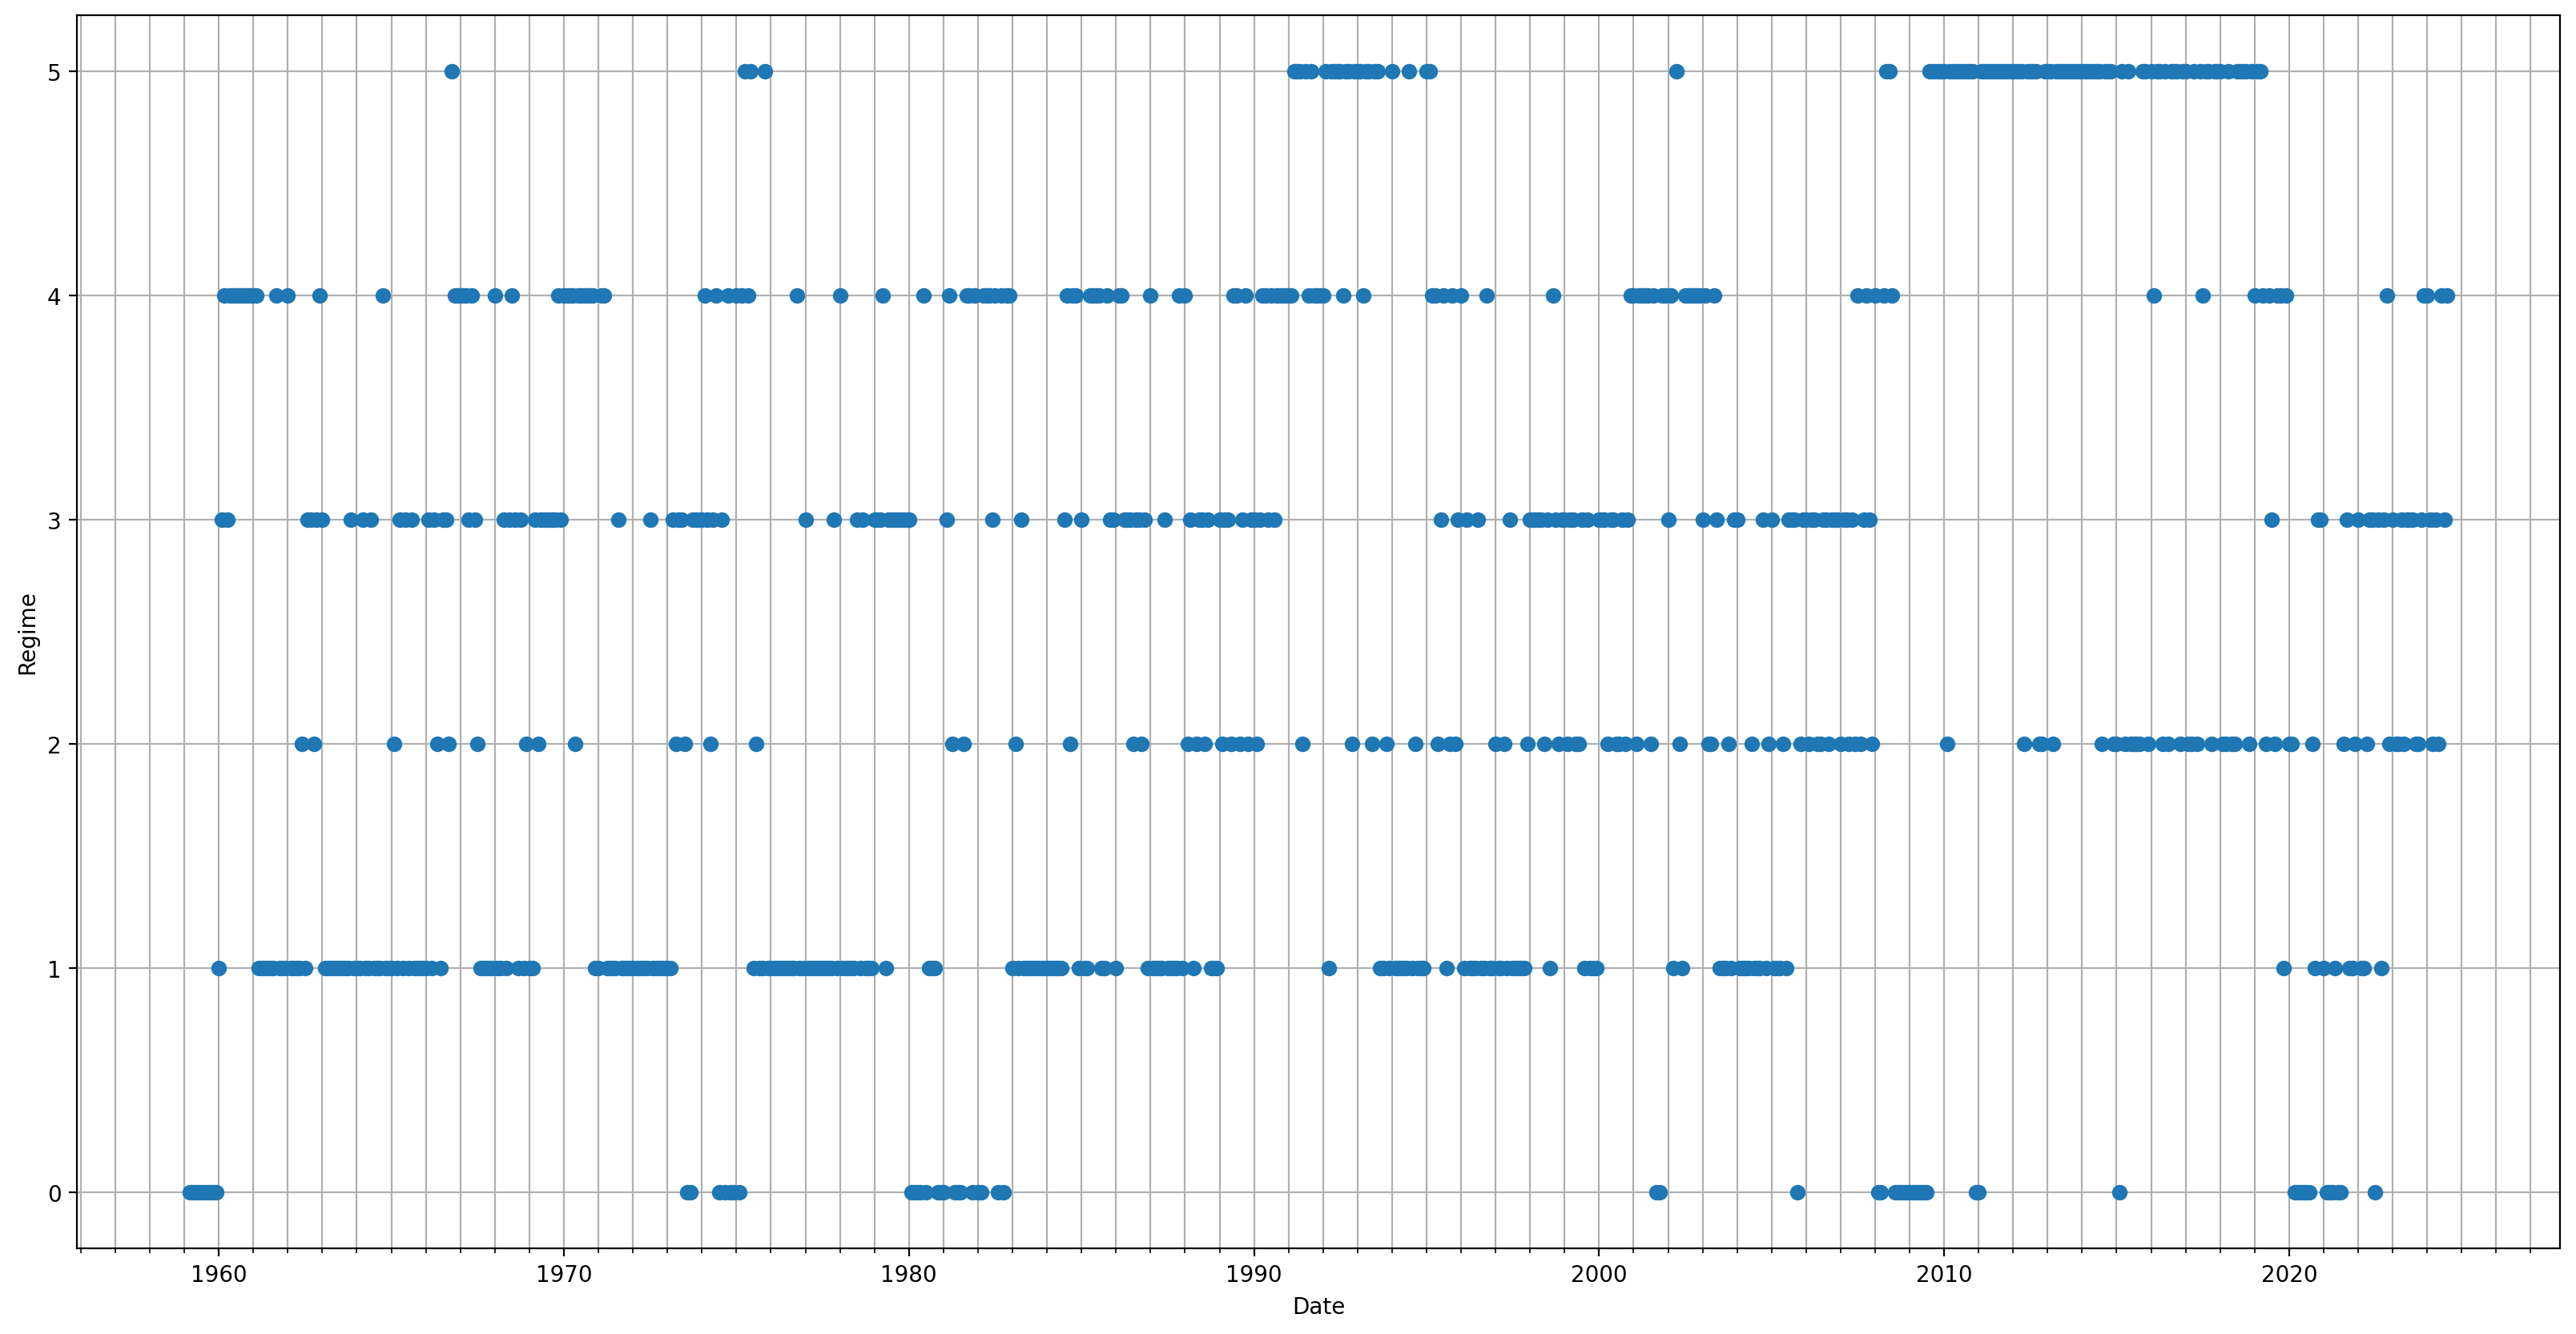

In [8]:
#shown_step = 100
#shown_clusters = memory[f"cluster_step{shown_step}"]
shown_clusters = final_clusters

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(shown_clusters.index, shown_clusters.values, marker="o", linestyle="")
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.YearLocator())
plt.xlabel("Date")
plt.ylabel("Regime")
plt.grid(which="both")

<Figure size 640x480 with 0 Axes>

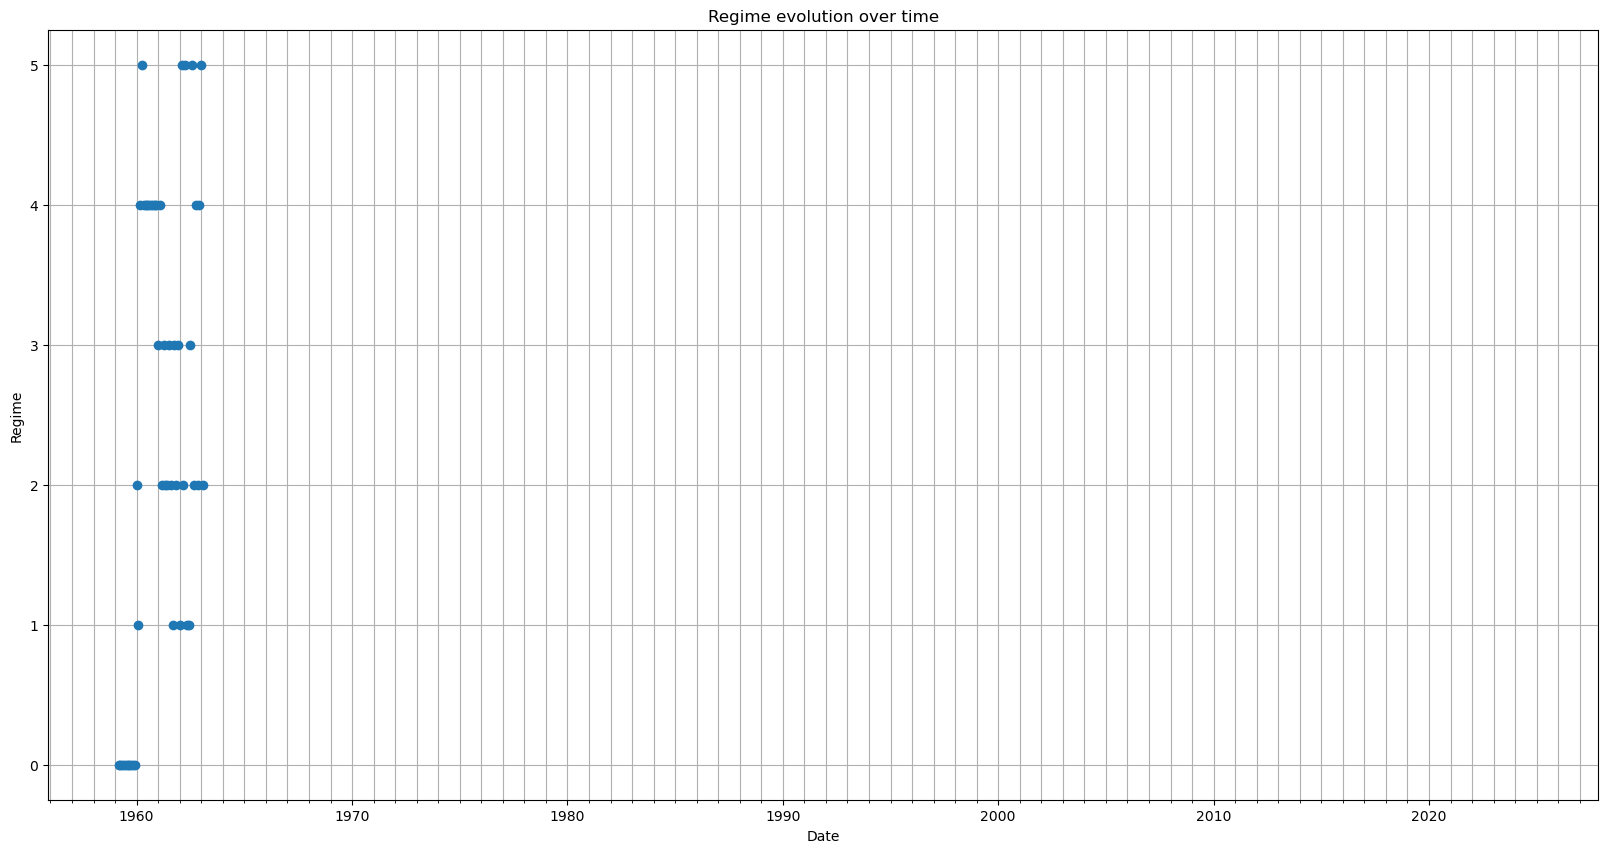

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

shown_clusters = memory[f"cluster_step{len(all_probs) - 1}"]
plt.clf()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plot = ax.plot(shown_clusters.index, shown_clusters.values, marker="o", linestyle="")[0]
ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.set(xlabel="Date", ylabel="Regime", title="Regime evolution over time")
plt.grid(which="both")

def update(frame):
    shown_clusters = memory[f"cluster_step{frame}"]
    plot.set_xdata(shown_clusters.index)
    plot.set_ydata(shown_clusters.values)
    return plot
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(all_probs) - 1, interval=1)
ani.save(filename="regime_evolution.gif", writer="pillow")

# View statistics of each cluster:

In [10]:
import numpy as np

raw_data = pd.read_csv('data/inputs/fredmd_transf.csv')
raw_data["date"] = pd.to_datetime(raw_data["date"])
raw_data = raw_data.set_index("date")
raw_data = raw_data.interpolate(method='linear', limit_direction='forward', axis=0)
raw_data = raw_data.fillna(method='ffill')
raw_data = raw_data.fillna(method='bfill')
raw_data = raw_data.dropna()

major_cols = ['RPI', 'UNRATE', 'UMCSENTx', 'FEDFUNDS', 'CPIAUCSL', 'S&P 500']

full_stats = []
for i in range(final_probs.shape[1]):
    cur_cluster = final_clusters[final_clusters == i]
    fred_data = raw_data.loc[cur_cluster.index]
    print(f"Cluster {i} Statistics:")
    # get average of each column
    full_stats.append([])
    for col in major_cols:
        print(f"    {col}: {fred_data[col].mean()}")
        full_stats[-1].append(fred_data[col].mean())
    full_stats[-1] = np.array(full_stats[-1])
full_stats = np.array(full_stats)

Cluster 0 Statistics:
    RPI: 0.0009141532060997043
    UNRATE: 0.11344537815126053
    UMCSENTx: 0.040336134453780294
    FEDFUNDS: -0.10428571428571427
    CPIAUCSL: 0.004718099274309498
    S&P 500: 0.002621302228465114
Cluster 1 Statistics:
    RPI: 0.002249308576985958
    UNRATE: -0.04779411764705883
    UMCSENTx: 0.28382352941176464
    FEDFUNDS: 0.007941176470588222
    CPIAUCSL: 0.0015902970851549682
    S&P 500: 0.008211533337481654
Cluster 2 Statistics:
    RPI: 0.0027751254907359456
    UNRATE: -0.03999999999999999
    UMCSENTx: -0.11809523809524004
    FEDFUNDS: 0.19028571428571428
    CPIAUCSL: 0.005438143568091042
    S&P 500: -0.0014979387820346288
Cluster 3 Statistics:
    RPI: 0.0031979513537671593
    UNRATE: -0.029838709677419344
    UMCSENTx: 0.1524193548387095
    FEDFUNDS: 0.06451612903225805
    CPIAUCSL: 0.002246354703119561
    S&P 500: 0.011579222541646296
Cluster 4 Statistics:
    RPI: 0.004771429342071615
    UNRATE: -0.05575221238938052
    UMCSENTx: 0.59

<Figure size 640x480 with 0 Axes>

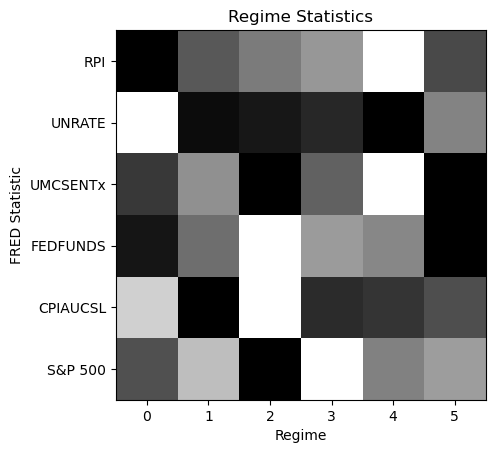

In [11]:
full_stats_plot = full_stats.copy().T
full_stats_plot = full_stats_plot - full_stats_plot.min(axis=1, keepdims=True)
full_stats_plot = full_stats_plot / full_stats_plot.max(axis=1, keepdims=True)

import matplotlib.pyplot as plt
plt.clf()
fig, ax = plt.subplots()
ax.imshow(full_stats_plot, cmap='gray', interpolation='nearest')
ax.set_yticks(np.arange(len(major_cols)))
ax.set_yticklabels(major_cols)
ax.set(xlabel="Regime", ylabel="FRED Statistic", title="Regime Statistics")
fig.show()

# Compute and analyze transition matrix:

In [17]:
from learning.memory import compute_transition_matrix
transition_test = compute_transition_matrix(memory)
last_transition = transition_test[last_day]
norm_last_transition = last_transition.copy()
for i in range(last_transition.shape[0]):
    print(f"Transition from regime {i}:")
    for j in range(last_transition.shape[1]):
        print(f"    to regime {j}: {last_transition[i, j]}")
        if i == j:
            norm_last_transition[i, j] = 0
        else:
            norm_last_transition[i, j] = last_transition[i, j] / (1 - last_transition[i, i])
print(last_transition)
print(norm_last_transition)

Transition from regime 0:
    to regime 0: 0.6017699115044248
    to regime 1: 0.07964601769911504
    to regime 2: 0.07964601769911504
    to regime 3: 0.10619469026548672
    to regime 4: 0.061946902654867256
    to regime 5: 0.07079646017699115
Transition from regime 1:
    to regime 0: 0.07386363636363637
    to regime 1: 0.5625
    to regime 2: 0.011363636363636364
    to regime 3: 0.005681818181818182
    to regime 4: 0.14204545454545456
    to regime 5: 0.20454545454545456
Transition from regime 2:
    to regime 0: 0.064
    to regime 1: 0.016
    to regime 2: 0.784
    to regime 3: 0.064
    to regime 4: 0.024
    to regime 5: 0.048
Transition from regime 3:
    to regime 0: 0.07142857142857142
    to regime 1: 0.026785714285714284
    to regime 2: 0.0625
    to regime 3: 0.5089285714285714
    to regime 4: 0.16964285714285715
    to regime 5: 0.16071428571428573
Transition from regime 4:
    to regime 0: 0.05982905982905983
    to regime 1: 0.23931623931623933
    to regime 2:

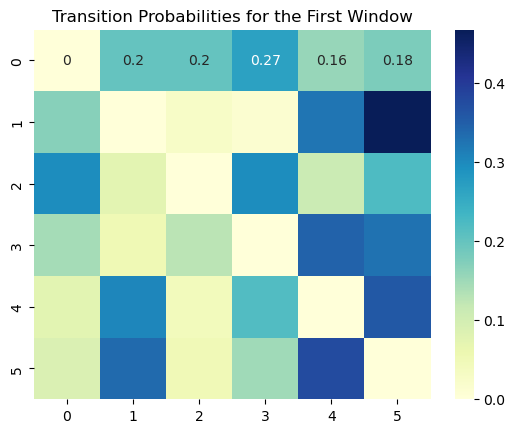

In [18]:
import seaborn as sns
import os
plt.clf()
sns.heatmap(norm_last_transition, annot=True, cmap="YlGnBu", xticklabels=range(6), yticklabels=range(6))
plt.title("Transition Probabilities for the First Window")
plt.savefig('transition_probabilities_tester.png')

<Figure size 640x480 with 0 Axes>

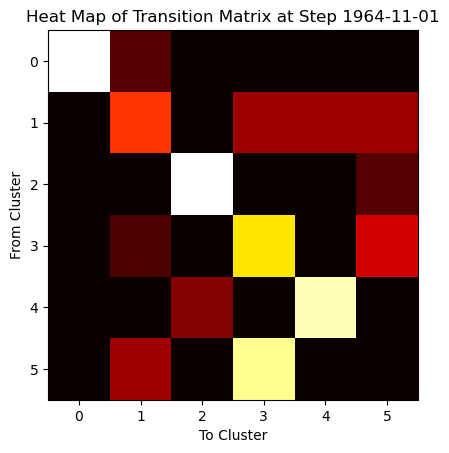

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

all_days = list(transition_test.keys())
all_days = pd.to_datetime(all_days, format="%Y-%m-%d")
all_days = all_days.sort_values()

plt.clf()
fig, ax = plt.subplots()
im = ax.imshow(transition_test[all_days[0].strftime("%Y-%m-%d")], cmap='hot', interpolation='nearest')
def update(frame):
    im.set_data(transition_test[all_days[frame].strftime("%Y-%m-%d")])
    ax.set_title(f'Heat Map of Transition Matrix at Step {all_days[frame].strftime("%Y-%m-%d")}')
    ax.set_xlabel('To Cluster')
    ax.set_ylabel('From Cluster')
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(transition_test), interval=1)
ani.save(filename="cluster_transition_evolution.gif", writer="pillow")

# Do predictions of future clusters:

In [36]:
import numpy as np

# probability distribution prediction over time
horizon = 36
starting_month = 150

starting_dist = final_probs[starting_month]
transition_mat = transition_test[-1]
dists = []
cur_dist = np.array(starting_dist).reshape(-1, 1)
dists.append(cur_dist.copy())
print(cur_dist.T * 100)
print('')
for i in range(horizon):
    cur_dist = np.matmul(transition_mat, cur_dist)
    dists.append(cur_dist.copy())
    print(cur_dist.T * 100)
    print('')

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots()
x = list(range(6))
im = ax.bar(x, dists[0].reshape(-1))
def update(frame):
    for i, b in enumerate(im):
        b.set_height(dists[frame].reshape(-1)[i])
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(dists), interval=1)
ani.save(filename="prob_dist_evolution.gif", writer="pillow")

IndexError: index 150 is out of bounds for axis 0 with size 1